# **Sesión 6 - Arbol de decision**

In [ ]:
#0. Importar las librerias
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns 
#seaborn, crear visualizaciones (gráficos)

from sklearn.preprocessing import LabelEncoder
#LabelEncoder, permite codificar datos

from sklearn.model_selection import train_test_split
#train_test_split, separar datos de entrenamiento y prueba

from sklearn.tree import DecisionTreeClassifier, plot_tree #Dibujar el árbol
#DecisionTreeClassifier, Crear y entrenar al árbol

In [ ]:
#1. Cargar los datos
df = pd.read_csv("Pacientes.csv")

In [ ]:
#2. Exploración inicial
#2.1. Ver los primeros registros
df.head(10)

,NOEXPED,Enfermedad,HIPERTEN,HIPERGLU,HDLBAJA,HIPERTRI,CINTALTA,EDAD,GENERO,FUMA,ALCOHOL,POLIURIA
0,1,NO,0,0,1,0,0,38,0,0,0,0
1,2,SI,0,1,1,1,1,49,1,0,0,0
2,3,SI,1,1,0,1,1,59,1,0,0,1
3,4,NO,1,1,0,0,0,44,0,0,0,0
4,5,NO,0,0,1,0,0,42,0,0,0,0
5,6,NO,0,0,1,0,1,38,0,0,0,0
6,7,SI,1,1,1,0,1,56,1,0,0,0
7,8,NO,0,0,1,0,1,53,0,1,0,0
8,10,SI,1,1,1,1,1,48,0,0,0,0
9,11,SI,0,0,1,1,1,39,1,0,1,0


In [ ]:
#2.2. Ver la información general
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   NOEXPED     985 non-null    int64 
 1   Enfermedad  985 non-null    object
 2   HIPERTEN    985 non-null    int64 
 3   HIPERGLU    985 non-null    int64 
 4   HDLBAJA     985 non-null    int64 
 5   HIPERTRI    985 non-null    int64 
 6   CINTALTA    985 non-null    int64 
 7   EDAD        985 non-null    int64 
 8   GENERO      985 non-null    int64 
 9   FUMA        985 non-null    int64 
 10  ALCOHOL     985 non-null    int64 
 11  POLIURIA    985 non-null    int64 
dtypes: int64(11), object(1)
memory usage: 92.5+ KB


In [7]:
#3. Limpiando y preparando datos
#a. Variable independiente
X = df.iloc[:,2:11]
X

,HIPERTEN,HIPERGLU,HDLBAJA,HIPERTRI,CINTALTA,EDAD,GENERO,FUMA,ALCOHOL
0,0,0,1,0,0,38,0,0,0
1,0,1,1,1,1,49,1,0,0
2,1,1,0,1,1,59,1,0,0
3,1,1,0,0,0,44,0,0,0
4,0,0,1,0,0,42,0,0,0
...,...,...,...,...,...,...,...,...,...
980,1,1,1,0,0,70,1,0,0
981,0,0,0,0,0,39,0,0,0
982,1,0,1,1,0,45,0,0,1
983,1,0,1,0,0,41,0,0,1


In [8]:
#b. Variable dependiente
Y = df["POLIURIA"]
Y

0      0
1      0
2      1
3      0
4      0
      ..
980    0
981    0
982    0
983    0
984    0
Name: POLIURIA, Length: 985, dtype: int64

In [11]:
#3.2. Separar los datos de entrenamiento y prueba
X_entrena,X_prueba, Y_entrena, Y_prueba = train_test_split(X,Y, train_size=0.75, random_state=45)
X_entrena

,HIPERTEN,HIPERGLU,HDLBAJA,HIPERTRI,CINTALTA,EDAD,GENERO,FUMA,ALCOHOL
281,0,0,1,0,0,46,0,0,0
408,0,0,0,1,0,52,1,1,1
253,0,0,1,0,0,19,0,0,0
722,0,1,1,0,1,41,0,0,0
931,0,0,0,0,0,22,0,0,0
...,...,...,...,...,...,...,...,...,...
544,0,0,1,0,0,48,0,0,0
892,1,0,0,0,1,40,0,0,0
643,1,0,1,0,0,35,1,0,0
414,1,1,1,1,0,49,1,1,1


In [15]:
#4. Crear el árbol
arbol = DecisionTreeClassifier(max_depth=4)

In [16]:
#4.1. entrenar al modelo
arbol.fit(X_entrena,Y_entrena)

DecisionTreeClassifier(max_depth=4)

[Text(0.671875, 0.9, 'EDAD <= 76.5\ngini = 0.078\nsamples = 738\nvalue = [708, 30]\nclass = No Diabetes'),
 Text(0.46875, 0.7, 'HIPERGLU <= 0.5\ngini = 0.076\nsamples = 736\nvalue = [707, 29]\nclass = No Diabetes'),
 Text(0.5703125, 0.8, 'True  '),
 Text(0.25, 0.5, 'EDAD <= 45.5\ngini = 0.054\nsamples = 543\nvalue = [528, 15]\nclass = No Diabetes'),
 Text(0.125, 0.3, 'EDAD <= 42.5\ngini = 0.031\nsamples = 321\nvalue = [316, 5]\nclass = No Diabetes'),
 Text(0.0625, 0.1, 'gini = 0.038\nsamples = 256\nvalue = [251, 5]\nclass = No Diabetes'),
 Text(0.1875, 0.1, 'gini = 0.0\nsamples = 65\nvalue = [65, 0]\nclass = No Diabetes'),
 Text(0.375, 0.3, 'EDAD <= 55.5\ngini = 0.086\nsamples = 222\nvalue = [212, 10]\nclass = No Diabetes'),
 Text(0.3125, 0.1, 'gini = 0.11\nsamples = 172\nvalue = [162, 10]\nclass = No Diabetes'),
 Text(0.4375, 0.1, 'gini = 0.0\nsamples = 50\nvalue = [50, 0]\nclass = No Diabetes'),
 Text(0.6875, 0.5, 'EDAD <= 59.5\ngini = 0.135\nsamples = 193\nvalue = [179.0, 14.0]\ncla

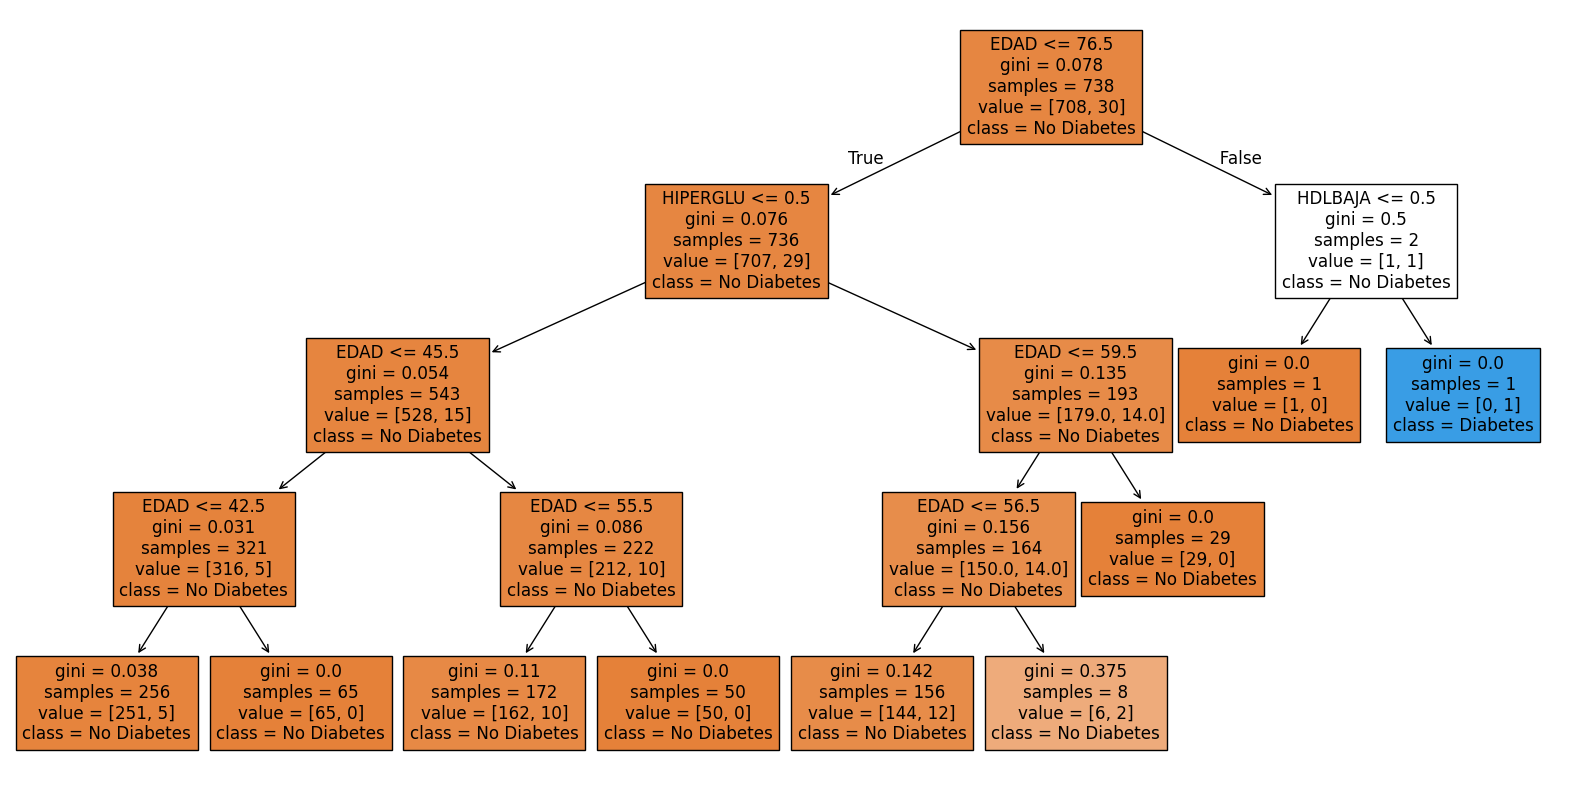

In [17]:
#5. Crear el árbol de forma gráfico
plt.figure(figsize=(20,10))
plot_tree(arbol, feature_names=X.columns, class_names=["No Diabetes","Diabetes"], filled=True )

[Text(0.671875, 0.9, 'EDAD <= 76.5\ngini = 0.078\nsamples = 738\nvalue = [708, 30]\nclass = No Diabetes'),
 Text(0.46875, 0.7, 'HIPERGLU <= 0.5\ngini = 0.076\nsamples = 736\nvalue = [707, 29]\nclass = No Diabetes'),
 Text(0.5703125, 0.8, 'True  '),
 Text(0.25, 0.5, 'EDAD <= 45.5\ngini = 0.054\nsamples = 543\nvalue = [528, 15]\nclass = No Diabetes'),
 Text(0.125, 0.3, 'EDAD <= 42.5\ngini = 0.031\nsamples = 321\nvalue = [316, 5]\nclass = No Diabetes'),
 Text(0.0625, 0.1, 'gini = 0.038\nsamples = 256\nvalue = [251, 5]\nclass = No Diabetes'),
 Text(0.1875, 0.1, 'gini = 0.0\nsamples = 65\nvalue = [65, 0]\nclass = No Diabetes'),
 Text(0.375, 0.3, 'EDAD <= 55.5\ngini = 0.086\nsamples = 222\nvalue = [212, 10]\nclass = No Diabetes'),
 Text(0.3125, 0.1, 'gini = 0.11\nsamples = 172\nvalue = [162, 10]\nclass = No Diabetes'),
 Text(0.4375, 0.1, 'gini = 0.0\nsamples = 50\nvalue = [50, 0]\nclass = No Diabetes'),
 Text(0.6875, 0.5, 'EDAD <= 59.5\ngini = 0.135\nsamples = 193\nvalue = [179.0, 14.0]\ncla

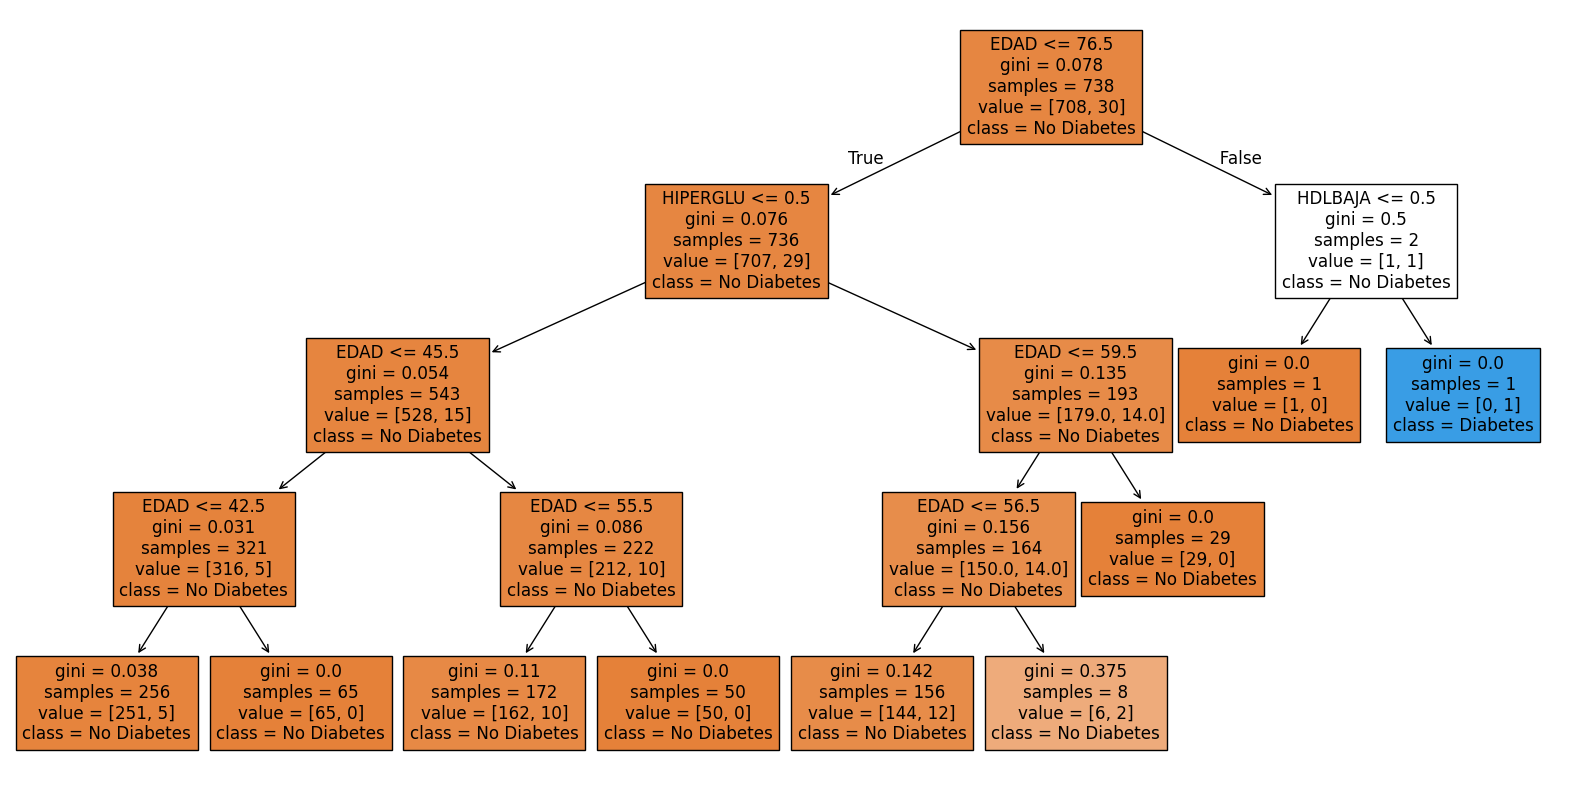

In [17]:
#5. Crear el árbol de forma gráfico
plt.figure(figsize=(20,10))
plot_tree(arbol, feature_names=X.columns, class_names=["No Diabetes","Diabetes"], filled=True )

In [20]:
#6. Realizar la predicción
#ya tenemos datos para probar
X_prueba

,HIPERTEN,HIPERGLU,HDLBAJA,HIPERTRI,CINTALTA,EDAD,GENERO,FUMA,ALCOHOL
551,0,0,0,0,0,39,0,0,0
423,0,1,1,0,0,48,1,0,0
225,0,0,1,0,0,18,0,1,0
893,0,1,1,0,1,44,1,0,0
133,0,1,0,0,1,47,0,0,0
...,...,...,...,...,...,...,...,...,...
775,0,1,1,1,1,33,0,0,0
785,0,1,0,0,1,41,1,0,0
382,0,0,1,1,1,28,1,0,1
262,0,0,1,0,0,18,0,0,0


In [21]:
#Prediccion con los datos de prueba
Y_pred = arbol.predict(X_prueba)
Y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0], dtype=int64)